
Logistic Regression
Accuracy: 0.75 | F1: 0.66
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



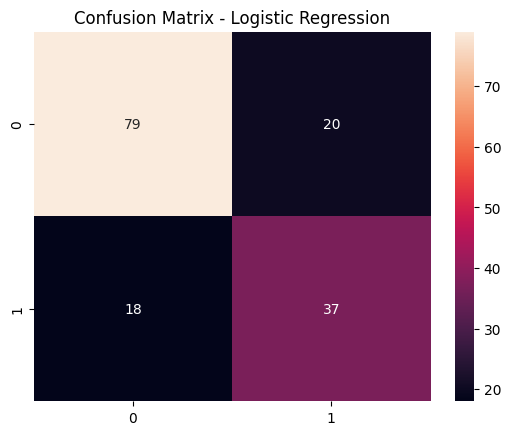


Decision Tree
Accuracy: 0.75 | F1: 0.67
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



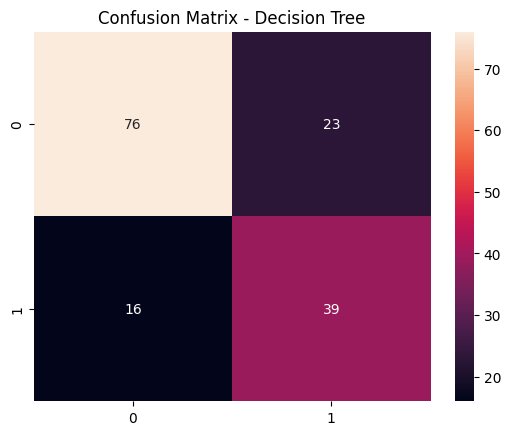


Random Forest
Accuracy: 0.75 | F1: 0.65
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



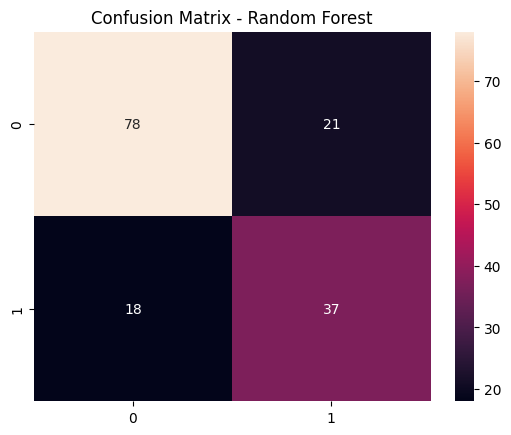


KNN
Accuracy: 0.69 | F1: 0.54
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



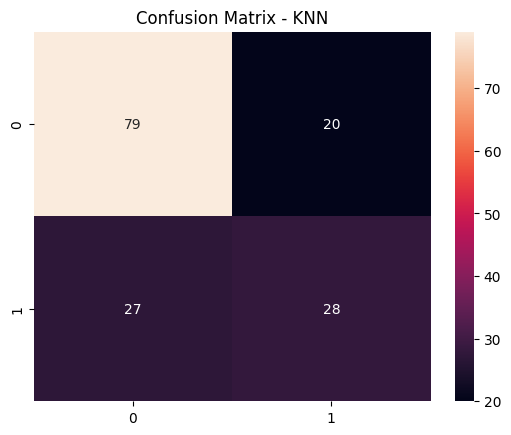

Saved best model: Decision Tree


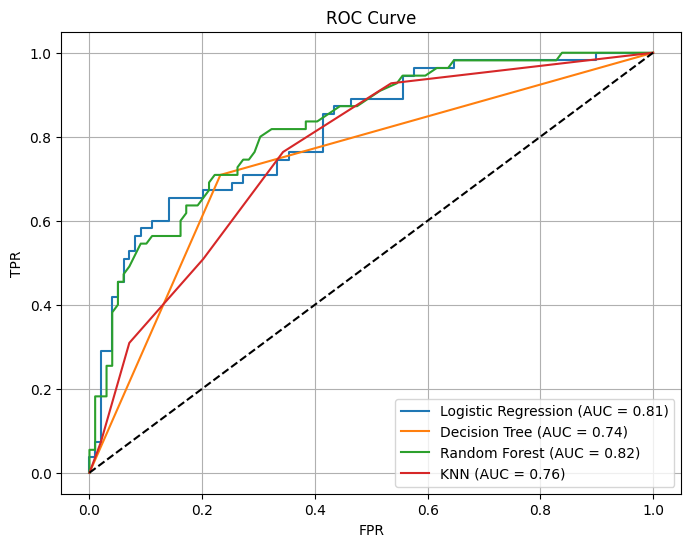


🔷 Enter patient details:
Pregnancies: 3
Glucose: 198
Blood Pressure: 78
Skin Thickness: 45
Insulin: 258
BMI: 1.678
Diabetes Pedigree Function: 0.376
Age: 46

✅ Prediction: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import joblib

# Load dataset
df = pd.read_csv("/content/diabetes dataset.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    prob = model.predict_proba(X_test_scaled)[:, 1]
    results[name] = {
        "model": model,
        "f1": f1_score(y_test, pred),
        "roc_auc": roc_auc_score(y_test, prob),
        "y_pred": pred,
        "y_prob": prob
    }
    print(f"\n{name}\nAccuracy: {accuracy_score(y_test, pred):.2f} | F1: {results[name]['f1']:.2f}")
    print(classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Save best model
best_name = max(results, key=lambda x: results[x]["f1"])
joblib.dump(results[best_name]["model"], "best_diabetes_model.pkl")
print(f"Saved best model: {best_name}")

# ROC Curve
plt.figure(figsize=(8, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["y_prob"])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()

# ---------- USER PREDICTION ----------
model = joblib.load("best_diabetes_model.pkl")
scaler.fit(X)  # Refit scaler on full data

print("\n🔷 Enter patient details:")
vals = []
labels = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']
for lbl in labels:
    vals.append(float(input(f"{lbl}: ")))

input_array = np.array([vals])
input_scaled = scaler.transform(input_array)
output = model.predict(input_scaled)

print("\n✅ Prediction:", "Diabetic" if output[0] == 1 else "Not Diabetic")
